# Feature Engineering and Modelling

---

1. Import packages
2. Load data
3. Modelling

---

## 1. Import packages

In [29]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

---
## 2. Load data

In [31]:
df = pd.read_csv('./data_for_predictions.csv')
df.drop(columns=["Unnamed: 0"], inplace=True)
df.head()

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,...,months_modif_prod,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
0,24011ae4ebbe3035111d65fa7c15bc57,0.000000,4.739944,0.000000,0.000000,0.0,0.444045,0.114481,0.098142,40.606701,...,2,6,0,0,1,0,0,0,0,1
1,d29c2c54acc38ff3c0614d0a653813dd,3.668479,0.000000,0.000000,2.280920,0.0,1.237292,0.145711,0.000000,44.311378,...,76,4,1,0,0,0,0,1,0,0
2,764c75f661154dac3a6c254cd082ea7d,2.736397,0.000000,0.000000,1.689841,0.0,1.599009,0.165794,0.087899,44.311378,...,68,8,0,0,1,0,0,1,0,0
3,bba03439a292a1e166f80264c16191cb,3.200029,0.000000,0.000000,2.382089,0.0,1.318689,0.146694,0.000000,44.311378,...,69,9,0,0,0,1,0,1,0,0
4,149d57cf92fc41cf94415803a877cb4b,3.646011,0.000000,2.721811,2.650065,0.0,2.122969,0.116900,0.100015,40.606701,...,71,9,1,0,0,0,0,1,0,0


---

## 3. Modelling

We now have a dataset containing features that we have engineered and we are ready to start training a predictive model. Remember, we only need to focus on training a `Random Forest` classifier.

In [32]:
from sklearn import metrics
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

### Data sampling

The first thing we want to do is split our dataset into training and test samples. The reason why we do this, is so that we can simulate a real life situation by generating predictions for our test sample, without showing the predictive model these data points. This gives us the ability to see how well our model is able to generalise to new data, which is critical.

A typical % to dedicate to testing is between 20-30, for this example we will use a 75-25% split between train and test respectively.

In [33]:
# Make a copy of our data
train_df = df.copy()

# Separate target variable from independent variables
y = df['churn']
X = df.drop(columns=['id', 'churn'])
print(X.shape)
print(y.shape)

(14606, 61)
(14606,)


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(10954, 61)
(10954,)
(3652, 61)
(3652,)


### Model training

Once again, we are using a `Random Forest` classifier in this example. A Random Forest sits within the category of `ensemble` algorithms because internally the `Forest` refers to a collection of `Decision Trees` which are tree-based learning algorithms. As the data scientist, you can control how large the forest is (that is, how many decision trees you want to include).

The reason why an `ensemble` algorithm is powerful is because of the laws of averaging, weak learners and the central limit theorem. If we take a single decision tree and give it a sample of data and some parameters, it will learn patterns from the data. It may be overfit or it may be underfit, but that is now our only hope, that single algorithm. 

With `ensemble` methods, instead of banking on 1 single trained model, we can train 1000's of decision trees, all using different splits of the data and learning different patterns. It would be like asking 1000 people to all learn how to code. You would end up with 1000 people with different answers, methods and styles! The weak learner notion applies here too, it has been found that if you train your learners not to overfit, but to learn weak patterns within the data and you have a lot of these weak learners, together they come together to form a highly predictive pool of knowledge! This is a real life application of many brains are better than 1.

Now instead of relying on 1 single decision tree for prediction, the random forest puts it to the overall views of the entire collection of decision trees. Some ensemble algorithms using a voting approach to decide which prediction is best, others using averaging. 

As we increase the number of learners, the idea is that the random forest's performance should converge to its best possible solution.

Some additional advantages of the random forest classifier include:

- The random forest uses a rule-based approach instead of a distance calculation and so features do not need to be scaled
- It is able to handle non-linear parameters better than linear based models

On the flip side, some disadvantages of the random forest classifier include:

- The computational power needed to train a random forest on a large dataset is high, since we need to build a whole ensemble of estimators.
- Training time can be longer due to the increased complexity and size of thee ensemble

In [ ]:
# Add model training in here!
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42) # Add parameters to the model!
model.fit(X_train,y_train) # Complete this method call!

### Evaluation

Now let's evaluate how well this trained model is able to predict the values of the test dataset.

In [ ]:
# Generate predictions here!
y_pred=model.predict(X_test)

In [ ]:
# Calculate performance metrics here!
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1 Score:", metrics.f1_score(y_test, y_pred))
# For ROC-AUC (if you have probabilities)
y_prob = model.predict_proba(X_test)[:, 1]
print("ROC-AUC:", metrics.roc_auc_score(y_test, y_prob))

# Confusion Matrix
print("\nConfusion Matrix:\n", metrics.confusion_matrix(y_test, y_pred))

# Summary report
print("\nClassification Report:\n", metrics.classification_report(y_test, y_pred))


In [ ]:
'''

Accuracy (90%) → Overall, the model seems correct most of the time.

Precision (1.0) → Every time your model predicts “Positive”, it’s always correct — no false positives.

Recall (0.005) → But the model almost never predicts “Positive”! It’s missing nearly all actual positive cases.

F1-score (0.01) → Since F1 combines Precision and Recall, the very low Recall makes F1 almost zero.

ROC-AUC (0.63) → Slightly above random guessing (0.5), but far from good.

 This Tells Us

model is heavily biased toward the majority class (likely the negative class).
It’s probably predicting almost everything as “Negative”, except maybe 1 or 2 as “Positive”.

That’s why:

Accuracy looks high (because most samples are negative).

Precision looks perfect (because the few positives it predicts are correct).

Recall is near zero (it’s missing nearly all actual positives).

This is a classic symptom of an imbalanced dataset.

model is missing most customers who actually churn.'''

In [ ]:
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
from scipy.stats import randint

param_dist = {
    'n_estimators': randint(50, 300),
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'bootstrap': [True, False]
}

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,          # number of random combinations
    scoring='f1_macro',
    cv=5,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

print("Best Parameters:", random_search.best_params_)


In [35]:
best_rf = RandomForestClassifier(
    bootstrap=True,
    max_depth=10,
    min_samples_leaf=3,
    min_samples_split=4,
    n_estimators=137,
    random_state=42,           # important for reproducibility
    class_weight='balanced'    # optional, good for imbalanced data
)

In [ ]:
best_rf.fit(X_train, y_train)
y_pred = best_rf.predict(X_test)
y_prob = best_rf.predict_proba(X_test)[:, 1]  # for ROC-AUC

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1-score:", metrics.f1_score(y_test, y_pred))
print("ROC-AUC:", metrics.roc_auc_score(y_test, y_prob))

print("\nClassification Report:\n", metrics.classification_report(y_test, y_pred))

In [36]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)



best_rf.fit(X_res, y_res)

y_prob = best_rf.predict_proba(X_test)[:, 1]

In [41]:
for t in [0.5, 0.4, 0.3, 0.25, 0.2]:
    y_pred_t = (y_prob >= t).astype(int)
    print(f"Threshold={t}")
    print("Precision:", metrics.precision_score(y_test, y_pred_t))
    print("Recall:", metrics.recall_score(y_test, y_pred_t))
    print("F1:", metrics.f1_score(y_test, y_pred_t))
    print("-"*30)

Threshold=0.5
Precision: 0.21036585365853658
Recall: 0.1885245901639344
F1: 0.1988472622478386
------------------------------
Threshold=0.4
Precision: 0.163659793814433
Recall: 0.3469945355191257
F1: 0.2224168126094571
------------------------------
Threshold=0.3
Precision: 0.14056809905316825
Recall: 0.5273224043715847
F1: 0.2219666474985624
------------------------------
Threshold=0.25
Precision: 0.12897822445561138
Recall: 0.6311475409836066
F1: 0.2141863699582754
------------------------------
Threshold=0.2
Precision: 0.11948853615520282
Recall: 0.7404371584699454
F1: 0.20577069096431283
------------------------------


In [42]:
best_f1, best_t = 0, 0
for t in [i/100 for i in range(10, 60)]:
    y_pred_temp = (y_prob >= t).astype(int)
    f1 =metrics.f1_score(y_test, y_pred_temp)
    if f1 > best_f1:
        best_f1, best_t = f1, t

print(f"Best Threshold: {best_t}, Best F1: {best_f1}")


Best Threshold: 0.32, Best F1: 0.22985633978763273


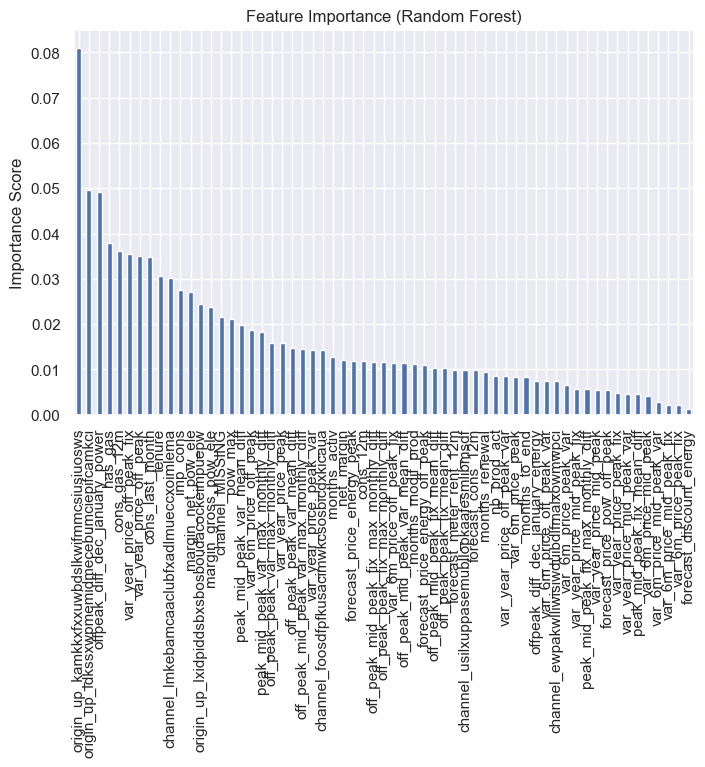

In [44]:
#which features Random Forest considers most important:
feature_importance = pd.Series(best_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

plt.figure(figsize=(8,5))
feature_importance.plot(kind='bar')
plt.title("Feature Importance (Random Forest)")
plt.ylabel("Importance Score")
plt.show()

Threshold=0.32
Precision: 0.14898785425101216
Recall: 0.5027322404371585
F1: 0.22985633978763273
------------------------------


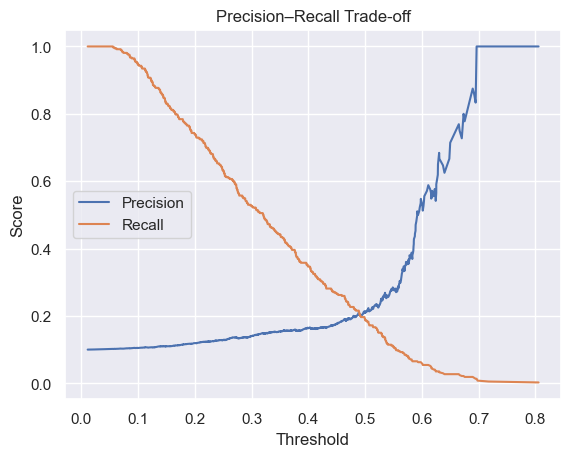

In [ ]:
y_pred_t = (y_prob >= 0.32).astype(int)
print(f"Threshold={0.32}")
print("Precision:", metrics.precision_score(y_test, y_pred_t))
print("Recall:", metrics.recall_score(y_test, y_pred_t))
print("F1:", metrics.f1_score(y_test, y_pred_t))
print("-"*30)


precisions, recalls, thresholds = metrics.precision_recall_curve(y_test, y_prob)
plt.plot(thresholds, precisions[:-1], label='Precision')
plt.plot(thresholds, recalls[:-1], label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.title('Precision–Recall Trade-off')
plt.show()

In [ ]:
''' model now correctly finds ~53% of churners (good recall).

Precision dropped, but that’s an acceptable trade-off in churn analytics.

F1-score improved — overall, the model’s balance and usefulness increased.'''